In [254]:
import sklearn as sk
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv('../csvs/lab8.csv',encoding='cp1251')
print(df.head(5))


   id  gender  age  income  spending_rating
0   1       1   19      15               39
1   2       1   21      15               81
2   3       0   20      16                6
3   4       0   23      16               77
4   5       0   31      17               40


In [255]:
scaler = StandardScaler()
x = df.drop(['id','gender'], axis=1)
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)
print(x_scaled.describe())

x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

print(x_normal)
print(x_normal.describe())


                  0           1             2
count  1.980000e+02  198.000000  1.980000e+02
mean  -1.345725e-17    0.000000 -8.186493e-17
std    1.002535e+00    1.002535  1.002535e+00
min   -1.496154e+00   -1.798943 -1.908243e+00
25%   -7.573597e-01   -0.701404 -6.084067e-01
50%   -1.987591e-01    0.043355  7.305224e-03
75%    7.202289e-01    0.670521  8.673472e-01
max    2.251876e+00    2.983193  1.922853e+00
            0         1         2
0   -0.610406 -0.771087 -0.181190
1   -0.507490 -0.713282  0.483407
2   -0.482297 -0.627752 -0.610997
3   -0.483579 -0.749253  0.452517
4   -0.302348 -0.930353 -0.207437
..        ...       ...       ...
193  0.217397  0.847801 -0.483707
194  0.164929  0.935464 -0.312578
195 -0.176169  0.923042  0.341991
196 -0.149017  0.912698 -0.380495
197 -0.190485  0.900242  0.391509

[198 rows x 3 columns]
                0           1           2
count  198.000000  198.000000  198.000000
mean     0.000783   -0.024501    0.003985
std      0.633074    0.53975

In [256]:
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())
x_principal.to_csv('../csvs/lab8new.csv', header=True)


         V1        V2
0 -0.359225 -0.802355
1 -0.625215 -0.734855
2 -0.037151 -0.647257
3 -0.585783 -0.768336
4 -0.071218 -0.930982


In [257]:
# df = pd.read_csv('../csvs/lab8new.csv',encoding='cp1251')
dbscan = DBSCAN(eps=0.055, min_samples=5).fit(x_principal)
x_principal['cluster'] = dbscan.labels_
print(x_principal.tail())

           V1        V2  cluster
193  0.367199  0.889214       -1
194  0.225767  0.971369       -1
195 -0.405476  0.925898       -1
196 -0.002821  0.918254       -1
197 -0.441687  0.901815       -1


In [258]:
print(set(dbscan.labels_))
print(len(set(dbscan.labels_)) - 1)
print(list(dbscan.labels_).count(-1) / len(list(dbscan.labels_)))

{0, 1, 2, -1}
3
0.8686868686868687


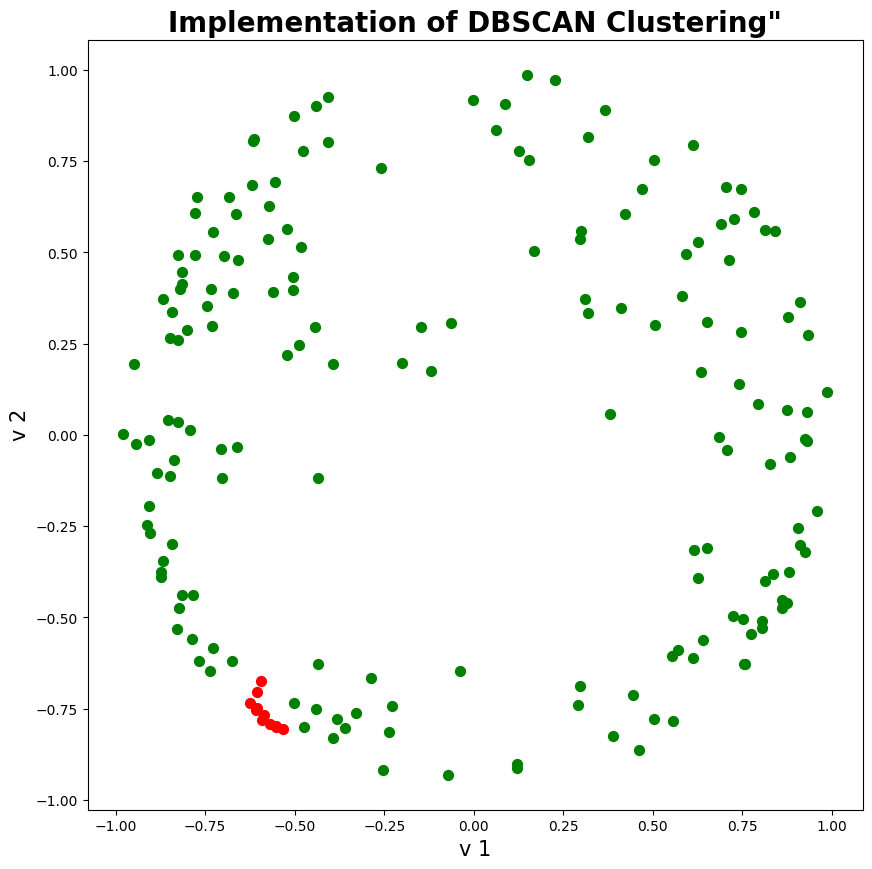

In [259]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('v 1', fontsize = 15)
ax.set_ylabel('v 2', fontsize = 15)
ax.set_title('Implementation of DBSCAN Clustering"', fontweight="bold", fontsize = 20)
labels = [0, -1]
colors = ['r', 'g']
for label, color in zip(labels, colors):
    indicesToKeep= x_principal['cluster'] == label
    ax.scatter(x_principal.loc[indicesToKeep, 'V1']
               , x_principal.loc[indicesToKeep, 'V2']
               , c = color, s = 50)
plt.show()


1. Загрузить пред обработанные данные, вывести первые 5 строк из 
датасета;
2. Стандартизировать данные;
3. Уменьшить размерность данных с помощью алгоритма главных 
компонент;
4. Реализовать методы DBSCAN и OPTICS; 
5. Выделить метки кластеров, количество и процент неудач;
6. Визуализировать полученные данные по каждому методу;
7. Сделать выводы и описать различие методов.

In [260]:
df = pd.read_csv('../csvs/lab8.csv',encoding='cp1251')
print(df.head(5))

   id  gender  age  income  spending_rating
0   1       1   19      15               39
1   2       1   21      15               81
2   3       0   20      16                6
3   4       0   23      16               77
4   5       0   31      17               40


In [261]:
scal = StandardScaler()
x = df.drop(['id','gender'], axis=1)
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

print(x_normal.describe())

                0           1           2
count  198.000000  198.000000  198.000000
mean     0.000783   -0.024501    0.003985
std      0.633074    0.539758    0.558869
min     -0.999719   -0.930353   -0.986610
25%     -0.491818   -0.559131   -0.470359
50%     -0.138736    0.034717    0.004407
75%      0.591621    0.430034    0.477197
max      0.999110    0.957036    0.981024


In [262]:
pca = PCA(n_components=2)

x_converted = pca.fit_transform(x_normal)
x_converted = pd.DataFrame(x_converted)
x_converted.columns = ['V1', 'V2']
print(x_converted.head())


         V1        V2
0 -0.359225 -0.802355
1 -0.625215 -0.734855
2 -0.037151 -0.647257
3 -0.585783 -0.768336
4 -0.071218 -0.930982


In [263]:
import numpy as np
from sklearn.metrics import silhouette_score


def find_best_dbscan_params(data, eps_values, min_samples_values):
    best_eps = None
    best_min_samples = None
    best_silhouette = -1
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)

            # Ignoring noise points (-1) for silhouette score calculation
            if len(set(labels)) - (1 if -1 in labels else 0) == 2:
                score = silhouette_score(data, labels)
                if score > best_silhouette:
                    best_silhouette = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels = labels

    return best_eps, best_min_samples, best_labels

eps_values = np.arange(0.1, 1.1, 0.025)
min_samples_values = range(2, 10)
best_eps, best_min_samples, best_labels = find_best_dbscan_params(x_converted, eps_values, min_samples_values)
print(f"\n\t\tBest params for DBSCAN\nMAX EPS: {best_eps},  MIN SAMP: {best_min_samples}")
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(x_converted)

def find_best_optics_params(data, min_samples_values, max_eps_values):
    best_min_samples = None
    best_max_eps = None
    best_silhouette = -1
    best_labels = None

    for min_samples in min_samples_values:
        for max_eps in max_eps_values:
            optics = OPTICS(min_samples=min_samples, max_eps=max_eps)
            labels = optics.fit_predict(data)

            # Ignoring noise points (-1) for silhouette score calculation
            if len(set(labels)) - (1 if -1 in labels else 0) == 2:
                score = silhouette_score(data, labels)
                if score > best_silhouette:
                    best_silhouette = score
                    best_min_samples = min_samples
                    best_max_eps = max_eps
                    best_labels = labels

    return best_min_samples, best_max_eps, best_labels


min_samples_values = range(2, 10)
max_eps_values = np.arange(0.1, 1.1, 0.025)
best_min_samples, best_max_eps, best_labels = find_best_optics_params(x_converted, min_samples_values, max_eps_values)
print(f"\n\t\tBest params for OPTICS\nMAX EPS: {best_max_eps},  MIN SAMP: {best_min_samples}")
opt = OPTICS(max_eps=best_max_eps, min_samples=best_min_samples).fit(x_converted)


print(set(dbscan.labels_))
print(set(opt.labels_))

x_converted['DB_cluster'] = dbscan.labels_
x_converted['OPT_cluster'] = opt.labels_
x_converted['gender'] = df['gender']

print(x_converted.tail())


		Best params for DBSCAN
MAX EPS: 0.29999999999999993,  MIN SAMP: 7

		Best params for OPTICS
MAX EPS: 0.1,  MIN SAMP: 9
{0, 1}
{0, 1, -1}
           V1        V2  DB_cluster  OPT_cluster  gender
193  0.367199  0.889214           1           -1       0
194  0.225767  0.971369           1           -1       0
195 -0.405476  0.925898           0           -1       1
196 -0.002821  0.918254           1           -1       1
197 -0.441687  0.901815           0           -1       1


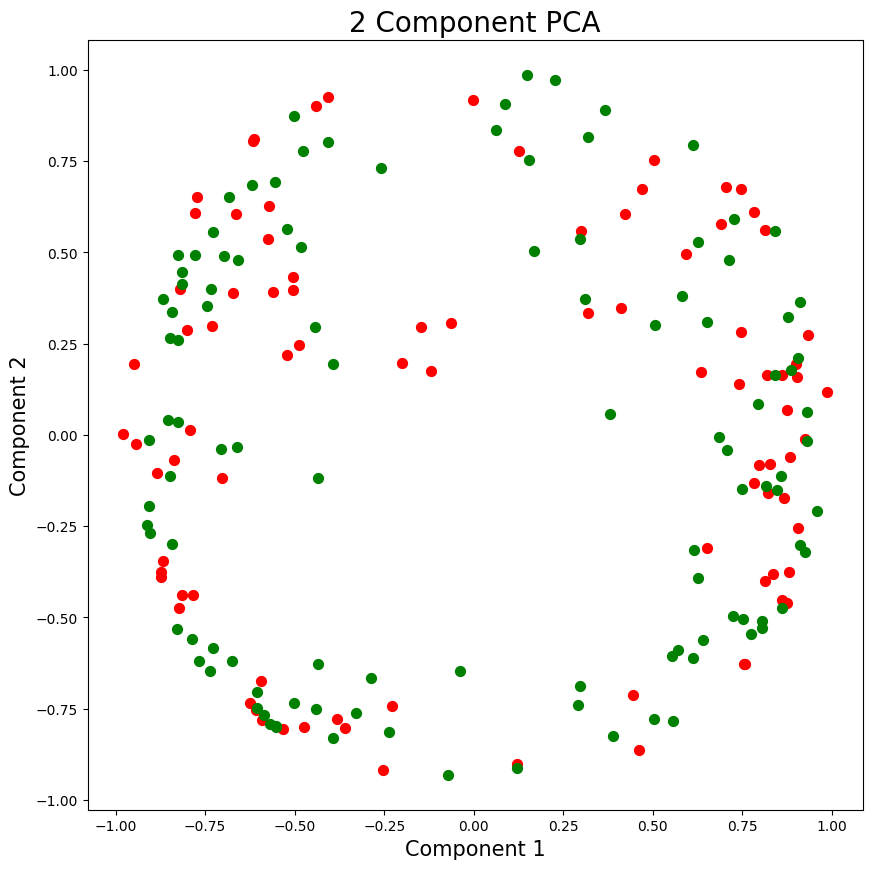

In [264]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
gender = [1, 0]
colors = ['r', 'g']
for gender, color in zip(gender,colors):
    indicesToKeep= x_converted['gender'] == gender
    ax.scatter(x_converted.loc[indicesToKeep, 'V1']
               , x_converted.loc[indicesToKeep, 'V2']
               , c = color, s = 50)
plt.show()

In [265]:
def calculate_errors(data, predicted_column, true_column):
    # Сравниваем предсказанные и истинные метки
    incorrect_predictions = data[data[predicted_column] != data[true_column]]

    # Количество неправильных предсказаний
    num_incorrect = incorrect_predictions.shape[0]

    # Общее количество данных
    total_data = data.shape[0]

    # Процент неправильных предсказаний
    error_percentage = (num_incorrect / total_data) * 100

    return num_incorrect, error_percentage

In [266]:
print("\n\t\tОценка ошибок:")

# Рассчет ошибок для DBSCAN кластеров
db_incorrect, db_error_percentage = calculate_errors(x_converted, 'DB_cluster', 'gender')
print(f"DBSCAN - Неправильные предсказания: {db_incorrect}, Процент ошибок: {db_error_percentage:.2f}%")

# Рассчет ошибок для OPTICS кластеров
opt_incorrect, opt_error_percentage = calculate_errors(x_converted, 'OPT_cluster', 'gender')
print(f"OPTICS - Неправильные предсказания: {opt_incorrect}, Процент ошибок: {opt_error_percentage:.2f}%")


		Оценка ошибок:
DBSCAN - Неправильные предсказания: 99, Процент ошибок: 50.00%
OPTICS - Неправильные предсказания: 182, Процент ошибок: 91.92%


C:\Users\Владелец\AppData\Local\Temp\ipykernel_8008\881923174.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(db_clusters))


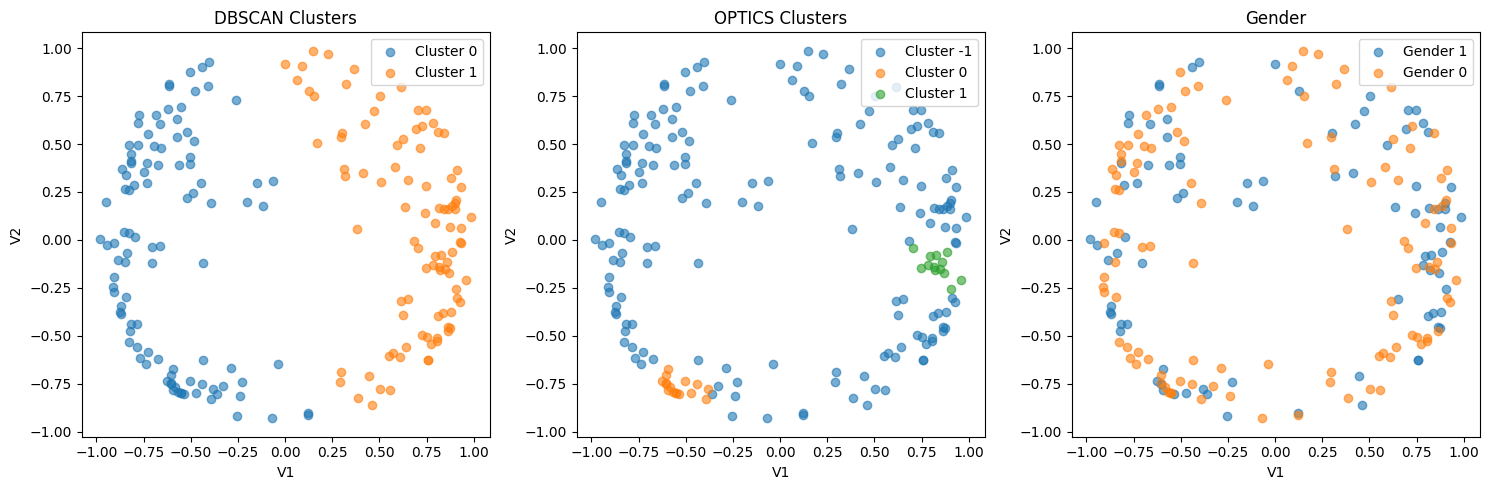

In [267]:
# Уникальные значения кластеров и пола для цвета
db_clusters = x_converted['DB_cluster'].unique()
opt_clusters = x_converted['OPT_cluster'].unique()
genders = x_converted['gender'].unique()

# Цветовая карта
colors = plt.cm.get_cmap('viridis', len(db_clusters))

# График для DBSCAN кластеров
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for cluster in db_clusters:
    cluster_data = x_converted[x_converted['DB_cluster'] == cluster]
    plt.scatter(cluster_data['V1'], cluster_data['V2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('DBSCAN Clusters')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()

# График для OPTICS кластеров
plt.subplot(1, 3, 2)
for cluster in opt_clusters:
    cluster_data = x_converted[x_converted['OPT_cluster'] == cluster]
    plt.scatter(cluster_data['V1'], cluster_data['V2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('OPTICS Clusters')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()

# График для пола (gender)
plt.subplot(1, 3, 3)
for gender in genders:
    gender_data = x_converted[x_converted['gender'] == gender]
    plt.scatter(gender_data['V1'], gender_data['V2'], label=f'Gender {gender}', alpha=0.6)
plt.title('Gender')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()

plt.tight_layout()
plt.show()

In [268]:
_tsne = TSNE(n_components=2)
x_converted = _tsne.fit_transform(x_normal)
x_converted = pd.DataFrame(x_converted)
x_converted.columns = ['V1', 'V2']

print(f"\n\t\tGREAT TEST ON TSNEed data\n")

eps_values = np.arange(0.1, 1.1, 0.025)
min_samples_values = range(2, 10)
best_eps, best_min_samples, best_labels = find_best_dbscan_params(x_converted, eps_values, min_samples_values)
print(f"\n\t\tBest params for DBSCAN\nMAX EPS: {best_eps},  MIN SAMP: {best_min_samples}")
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(x_converted)


min_samples_values = range(2, 10)
max_eps_values = np.arange(0.1, 1.1, 0.025)
best_min_samples, best_max_eps, best_labels = find_best_optics_params(x_converted, min_samples_values, max_eps_values)
print(f"\n\t\tBest params for OPTICS\nMAX EPS: {best_max_eps},  MIN SAMP: {best_min_samples}")
opt = OPTICS(max_eps=best_max_eps, min_samples=best_min_samples).fit(x_converted)

print(set(dbscan.labels_))
print(set(opt.labels_))

x_converted['DB_cluster'] = dbscan.labels_
x_converted['OPT_cluster'] = opt.labels_
x_converted['gender'] = df['gender']

print(x_converted.tail())




		GREAT TEST ON TSNEed data

		Best params for DBSCAN
MAX EPS: 0.8749999999999998,  MIN SAMP: 9


D:\.dev\Python\Lib\site-packages\sklearn\cluster\_optics.py:631: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
D:\.dev\Python\Lib\site-packages\sklearn\cluster\_optics.py:631: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
D:\.dev\Python\Lib\site-packages\sklearn\cluster\_optics.py:631: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
D:\.dev\Python\Lib\site-packages\sklearn\cluster\_optics.py:631: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
D:\.dev\Python\Lib\site-packages\sklearn\cluster\_optics.py:631: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
D:\.dev\Python\Lib\site-packages\sklearn\cluster\_


		Best params for OPTICS
MAX EPS: 0.7249999999999999,  MIN SAMP: 7
{0, 1, -1}
{0, 1, -1}
            V1         V2  DB_cluster  OPT_cluster  gender
193  -0.502313   9.896123          -1           -1       0
194  -1.055056  10.134099          -1           -1       0
195 -19.566687  -4.445850          -1           -1       1
196  -1.719159   9.493642          -1           -1       1
197 -19.495955  -4.648873          -1           -1       1


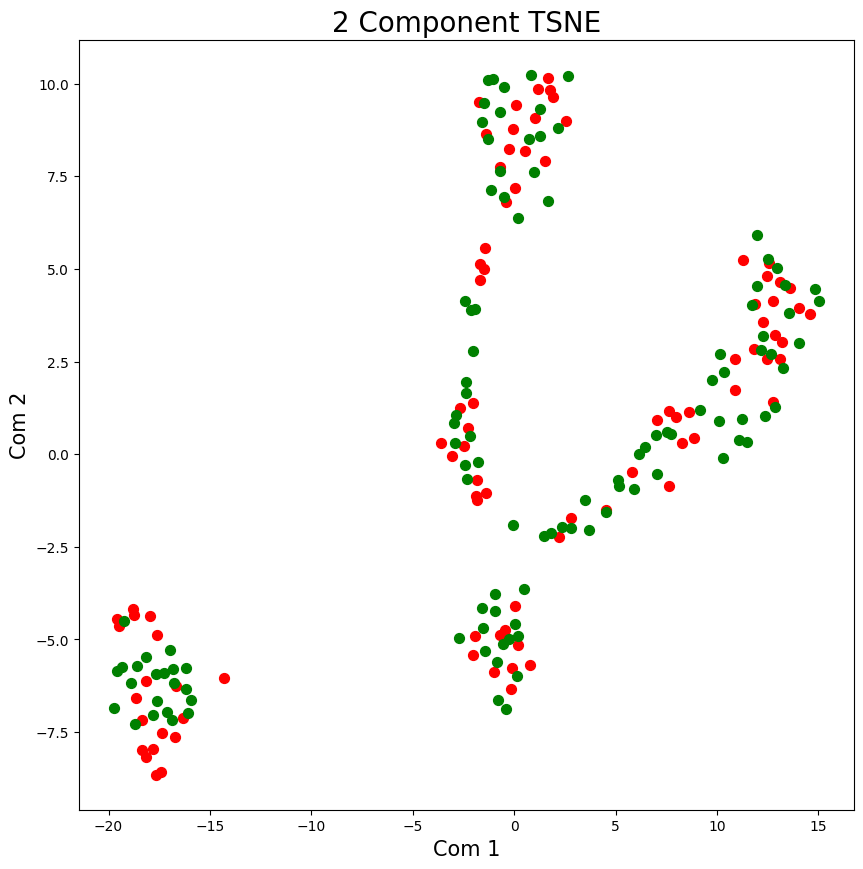

In [269]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Com 1', fontsize = 15)
ax.set_ylabel('Com 2', fontsize = 15)
ax.set_title('2 Component TSNE', fontsize = 20)
gender = [1, 0]
colors = ['r', 'g']
for gender, color in zip(gender,colors):
    indicesToKeep= x_converted['gender'] == gender
    ax.scatter(x_converted.loc[indicesToKeep, 'V1']
               , x_converted.loc[indicesToKeep, 'V2']
               , c = color, s = 50)
plt.show()

In [270]:
print("\n\t\tОценка ошибок:")

# Рассчет ошибок для DBSCAN кластеров
db_incorrect, db_error_percentage = calculate_errors(x_converted, 'DB_cluster', 'gender')
print(f"DBSCAN - Неправильные предсказания: {db_incorrect}, Процент ошибок: {db_error_percentage:.2f}%")

# Рассчет ошибок для OPTICS кластеров
opt_incorrect, opt_error_percentage = calculate_errors(x_converted, 'OPT_cluster', 'gender')
print(f"OPTICS - Неправильные предсказания: {opt_incorrect}, Процент ошибок: {opt_error_percentage:.2f}%")


		Оценка ошибок:
DBSCAN - Неправильные предсказания: 185, Процент ошибок: 93.43%
OPTICS - Неправильные предсказания: 189, Процент ошибок: 95.45%


C:\Users\Владелец\AppData\Local\Temp\ipykernel_8008\881923174.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(db_clusters))


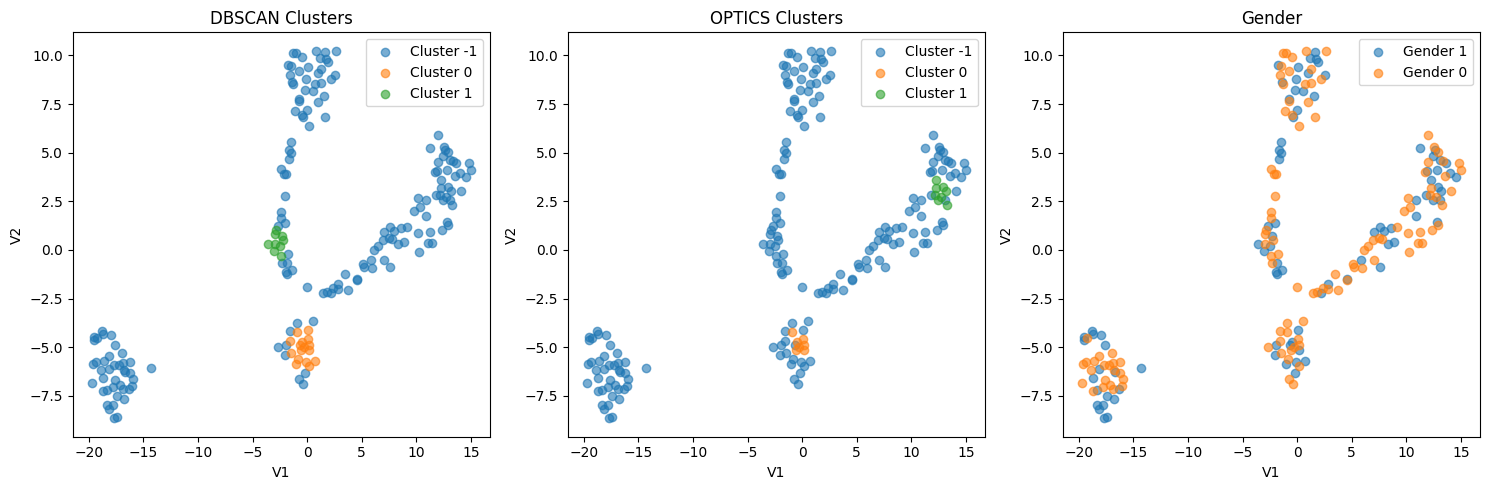

In [271]:
# Уникальные значения кластеров и пола для цвета
db_clusters = x_converted['DB_cluster'].unique()
opt_clusters = x_converted['OPT_cluster'].unique()
genders = x_converted['gender'].unique()

# Цветовая карта
colors = plt.cm.get_cmap('viridis', len(db_clusters))

# График для DBSCAN кластеров
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for cluster in db_clusters:
    cluster_data = x_converted[x_converted['DB_cluster'] == cluster]
    plt.scatter(cluster_data['V1'], cluster_data['V2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('DBSCAN Clusters')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()

# График для OPTICS кластеров
plt.subplot(1, 3, 2)
for cluster in opt_clusters:
    cluster_data = x_converted[x_converted['OPT_cluster'] == cluster]
    plt.scatter(cluster_data['V1'], cluster_data['V2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('OPTICS Clusters')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()

# График для пола (gender)
plt.subplot(1, 3, 3)
for gender in genders:
    gender_data = x_converted[x_converted['gender'] == gender]
    plt.scatter(gender_data['V1'], gender_data['V2'], label=f'Gender {gender}', alpha=0.6)
plt.title('Gender')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()

plt.tight_layout()
plt.show()

# CONCLUSION
### Ни PCA ни tsne не разделили выборку так, чтобы можно было выразить множества с определенным gender`ом. 

# OTCHET

In [351]:
pca = PCA(n_components=2)

x_converted = pca.fit_transform(x_normal)
x_converted = pd.DataFrame(x_converted)
x_converted.columns = ['V1', 'V2']
print(x_converted.head())

dbscan = DBSCAN(eps=0.29999999999999993, min_samples=7)
dbscan_labels = dbscan.fit_predict(x_converted)
dbscan_noise = (dbscan_labels  == -1)
dbscan_noise = np.array(dbscan_noise)

optics = OPTICS(eps=0.29999999999999993, min_samples=29)
optics_labels = optics.fit_predict(x_converted)
optics_noise = (optics_labels == -1)
optics_noise = np.array(optics_noise)



         V1        V2
0 -0.359225 -0.802355
1 -0.625215 -0.734855
2 -0.037151 -0.647257
3 -0.585783 -0.768336
4 -0.071218 -0.930982


In [352]:
print(set(dbscan.labels_))
print(set(optics.labels_))
print(optics_noise)

{0, 1}
{0, 1, -1}
[ True  True  True  True  True  True  True  True False  True False  True
  True  True False  True  True  True  True  True  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True  True
  True False  True  True False False False False False  True False False
  True False False False  True False False  True  True False False False
 False False  True False False  True False False  True False False  True
 False False  True  True False False  True False False  True  True False
  True False  True  True False False  True False  True False False False
 False False  True False  True  True  True False False False False  True
 False False  True  True False False False False False False False False
 False  True False False False False False False False False False  True
 False False False  True False False False False False False False False
 False False False False False Fa

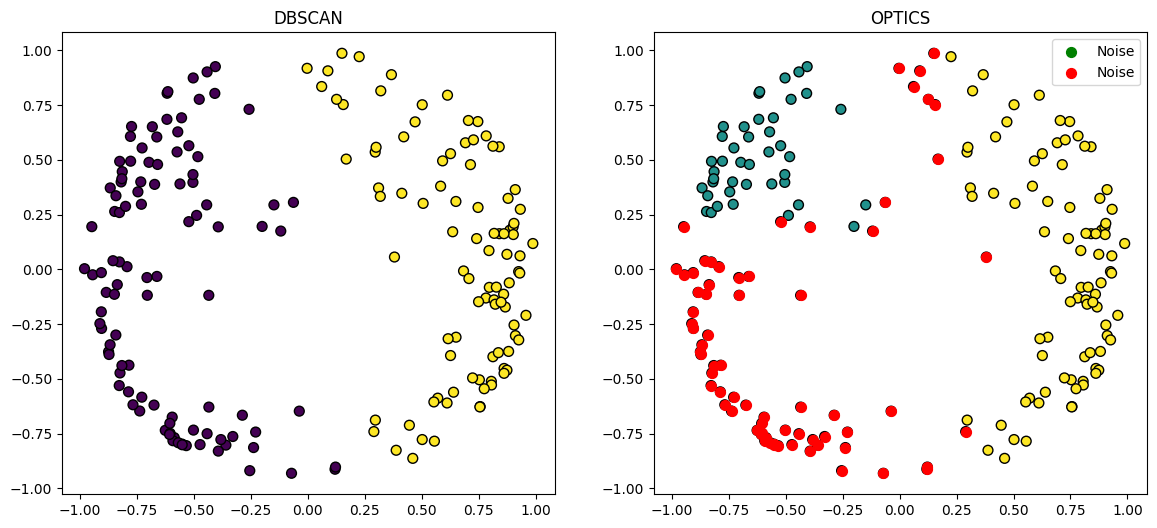

In [356]:
# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Результаты DBSCAN
ax[0].scatter(x_converted['V1'], x_converted['V2'], c=dbscan_labels, cmap='viridis', s=50, edgecolor='k')
ax[1].scatter(x_converted.loc[dbscan_noise, 'V1'], x_converted.loc[dbscan_noise, 'V2'], c='g', s=50, label='Noise')
ax[0].set_title('DBSCAN')

# Результаты OPTICS
ax[1].scatter(x_converted['V1'], x_converted['V2'], c=optics_labels, cmap='viridis', s=50, edgecolor='k')
ax[1].scatter(x_converted.loc[optics_noise, 'V1'], x_converted.loc[optics_noise, 'V2'], c='r', s=50, label='Noise')
ax[1].set_title('OPTICS')

plt.legend()
plt.show()

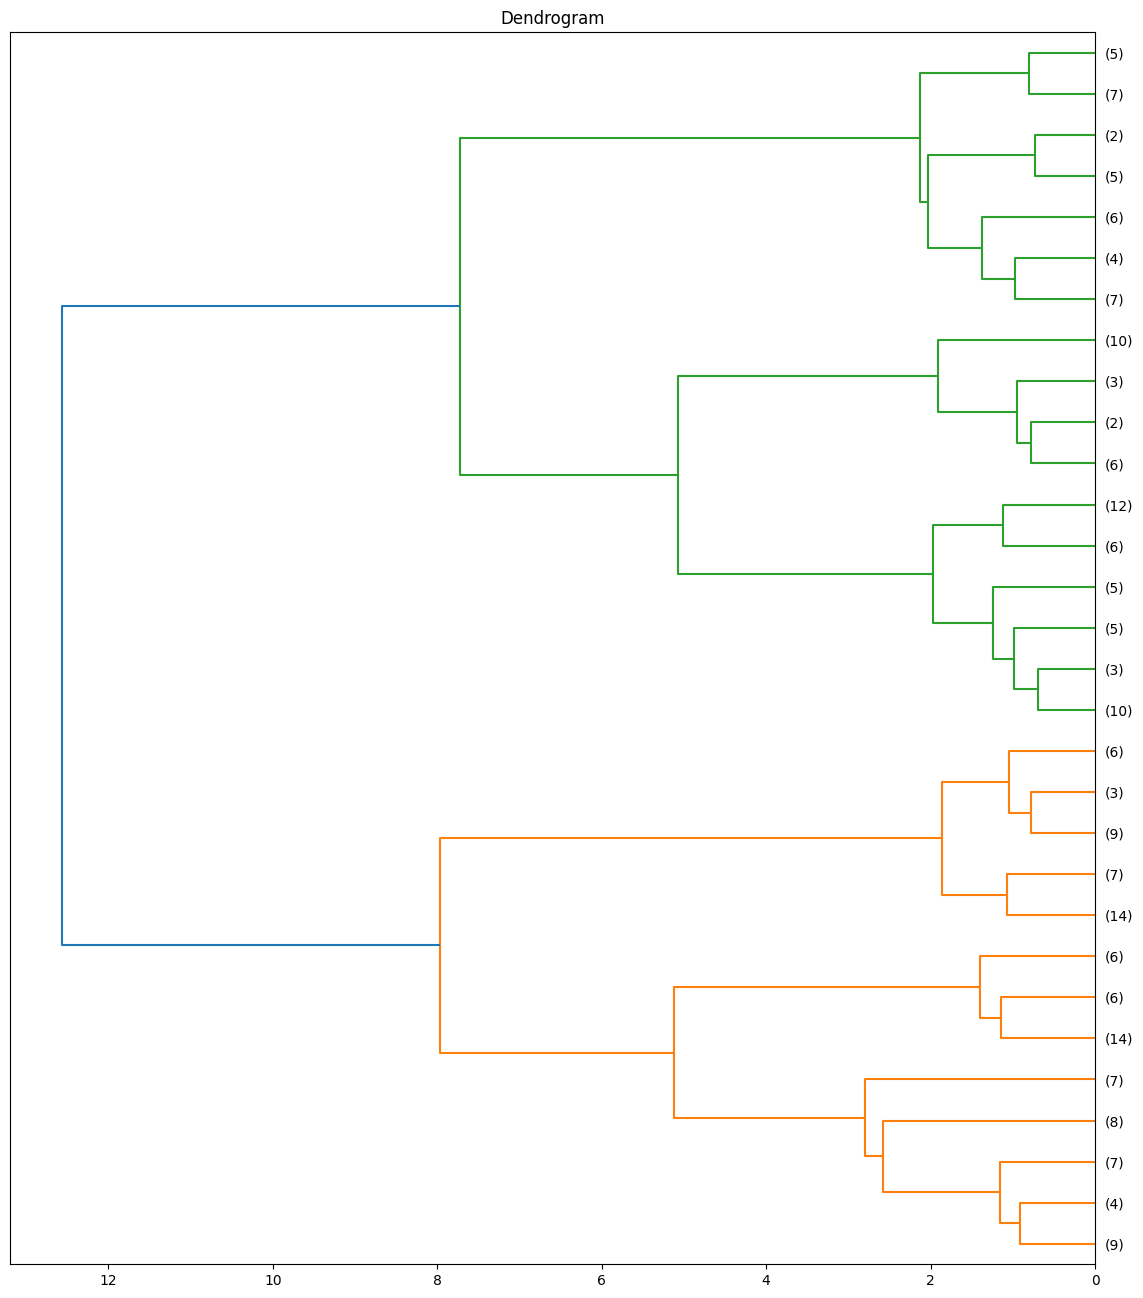

D:\.dev\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


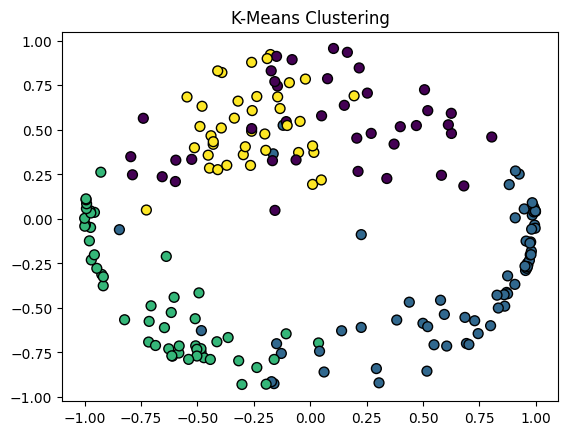

In [362]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


# Иерархическая кластеризация
linked = linkage(x_normal, 'ward')

# Построение дендрограммы
plt.figure(figsize=(14, 16))
dendrogram(linked,
           orientation='left',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp')
plt.title('Dendrogram')
plt.show()

# Кластеризация методом k-средних
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(x)

# Построение графика для k-средних
plt.scatter(x_normal[0], x_normal[1], c=kmeans_labels, cmap='viridis', s=50, edgecolor='k')
plt.title('K-Means Clustering')
plt.show()
